# **DATOS HISTÓRICOS DE BITCOIN**

**DATASET**  https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data  
  
**Integrantes:**  
  
- Sebastián Carrera  
- Yasna Villarroel  
- Kevin Vivanco  
## **Contexto del dataset** 
*Este dataset contiene información de la criptomoneda bitcoin, la información es desde el 01/01/2012 hasta mas o menos el 09/09/2025 (Aqui lo descargué, este dataset se actualiza a diario al parecer), entre las variables que podemos encontrar es la fecha en formato UNIX "Timestamp", valor de apertura "Open", el valor más alto "High", el valor mas bajo "Low", el valor de cierre "Close", Volumen transaccionado "Volume". Este dataset se maneja en ventanas de 1 minuto por lo que tiene la información completa, la idea es inicialmente transformarlo a dia para reducir la cantidad de valores a trabajar.*  
  
**Importancia:**
Este análisis es relevante porque permite comprender la evolución del precio de Bitcoin a lo largo del tiempo, identificar tendencias, ciclos y variaciones significativas. Con ello es posible evaluar si el paso del tiempo tiene algún efecto medible en el valor de cierre, lo cual es esencial desde una perspectiva estadística y para entender el comportamiento histórico de este activo altamente volátil.
## **Variables**
***Timestamp** - UNIX / segundos*  
***Open** - apertura*  
***High** - valor más alto*  
***Low** - valor más bajo*  
***Close** - valor de cierre*  
***Volume** - cantidad transaccionada*  


## **Planteamientos y preguntas de investigación** 

**EV1:**  
**Planteamiento:** Se propone analizar si el paso del tiempo tiene relación con la evolución del precio de Bitcoin. En particular, se busca comprobar si, desde 2012 en adelante, el valor de cierre diario muestra una tendencia creciente a medida que avanzan los días. *¿El paso del tiempo influye de manera significativa en el valor de cierre diario del Bitcoin entre 2012 y 2025?*  
  
**Hipótesis N°1:** El tiempo (En días) desde el 1 de enero del año 2012 tiene un efecto significativo sobre el valor de cierre diario de bitcoin, mostrando una tendencia de crecimiento a lo largo del período que se observa.  
  
  
**EV2:**  
**Planteamiento:** El precio de Bitcoin cambia constantemente y puede subir o bajar de forma muy brusca. Aun así, pareciera que las caídas fuertes influyen más en cómo termina el precio al final del día que los aumentos momentáneos. Por ello, es importante evaluar si el mercado reacciona con mayor fuerza a las bajas, lo que podría indicar un comportamiento más sensible a los retrocesos que a los impulsos alcistas.  
¿Las caídas en el precio mínimo afectan más al precio de cierre de Bitcoin que los aumentos en el precio de cierre?  
  
**Hipótesis N°2:** Las caídas en el precio mínimo (Low) tienen un efecto más fuerte sobre el precio de cierre (Close) que los incrementos en el precio máximo (High), lo que sugiere un sesgo bajista en la dinámica de mercado de Bitcoin.

#  **Metodología**

###  **Descripción del Dataset**
El dataset utilizado corresponde a información histórica de precios de **Bitcoin (BTC/USD)** obtenida desde fuentes públicas en línea (por ejemplo, *Kaggle – Bitcoin Historical Data*).  
Contiene datos de tipo *time series* con registros de precios por minuto, los cuales fueron posteriormente **transformados a frecuencia diaria**.  

**Características principales:**
- **Tamaño inicial:** más de 7 millones de registros (por minuto), reducidos a **4.994 observaciones diarias (01/01/2012 - 09/09/2025)**.  
- **Variables incluidas:**  
  - `Timestamp`: marca de tiempo UNIX del día.  
  - `Open`: precio de apertura.  
  - `High`: precio máximo diario.  
  - `Low`: precio mínimo diario.  
  - `Close`: precio de cierre diario.  
  - `Volume`: volumen total transaccionado.  
- **Licencia:** datos de libre uso con fines educativos y de investigación.  
- **Supuestos:** se asume que los datos reflejan con precisión las operaciones del mercado y que no presentan errores sistemáticos en las fuentes de origen.  
- **Limitaciones:** no considera factores externos (noticias, políticas, regulación, etc.), solo el comportamiento numérico del mercado.

---

###  **Carga y Preparación de Datos**
1. **Carga:** el archivo original (`btcusd_1-min-data.csv`) fue importado desde la carpeta `data/01_raw`.  
2. **Transformación temporal:** se convirtió el campo `Timestamp` de formato UNIX a fecha legible, y luego se **agregaron los datos por día** usando la función `resample('1D')`.  
3. **Estandarización:** se aplicó **`StandardScaler`** para normalizar las variables `Low`, `High`, `Close` y `Volume`, centrando la media en 0 y la desviación estándar en 1.  
4. **Manejo de nulos:** se verificó que no existieran valores faltantes (`.isnull().sum()`), confirmando integridad total del dataset.  
5. **Outliers:** fueron identificados mediante **boxplots y scatterplots**, pero no eliminados, ya que representan variaciones reales del mercado; en su lugar se optó por la **normalización** para reducir su impacto.  

---


###  **Partición y Validación**
Debido a que el dataset representa una **serie temporal continua** sin clases ni etiquetas, no fue necesaria la partición *train/test*.  
Sin embargo:
- Para los modelos de regresión, se evaluó el desempeño mediante el **R²** y el **p-value**.  
- En modelos robustos (RANSAC), se utilizó una validación interna por iteraciones aleatorias.  
- No se aplicó validación cruzada ni estratificación, dado que no existían categorías o clases desbalanceadas.

---

 *Esta metodología permitió preparar un dataset limpio, estandarizado y representativo del comportamiento histórico del Bitcoin, adecuado tanto para modelos de regresión como para análisis de clustering.*

###  **Modelos aplicados**

Para la **primera** parte de esta investigación se utilizaron los modelos:   
  
**HUBBER:** Modelo robusto para outliers.  
**Regresión Lineal:** Modelo para regresiones lineales simples.  
  
Durante la **segunda** etapa de esta investigación se utilizó:  
  
**Regresión Lineal:** Modelo para regresiones lineales simples.  
**RANSAC:** Otro modelo robusto para cuando se tiene outliers.  
**Clustering K-Means:** Un clustering según similitud.  
**Clustering DBSCAN:** Clustering según cercanía.

# WIP


###  **Software / Librerias**  
- **Visual Studio Code (VS Code):** entorno de desarrollo utilizado para la edición y ejecución de los notebooks, así como para la gestión del proyecto.  
  
- **Python 3.13.9:** lenguaje de programación principal para el procesamiento, análisis y visualización de los datos.  
  
- **Pandas:** manipulación de datos, cargas, transformaciones y resampleo de series temporales.  
  
- **NumPy:** operaciones numéricas y creación de variables derivadas.  
  
- **Matplotlib / Seaborn:** visualización de series temporales, histogramas, boxplots y otros gráficos.  
  
- **Scikit-Learn:** aplicación de modelos estadísticos como regresión lineal, HuberRegressor, K-Means, DBSCAN y escalamiento de datos.  
  
- **Jupyter Notebook / Jupyter Notebooks dentro de VS Code:** para la ejecución paso a paso del análisis exploratorio y modelos.  
  
- **PyArrow:** lectura y escritura de archivos Parquet utilizados en el pipeline.  


# **IMPORTACIONES** 

In [6]:
#Ejecutar las importaciones más generales
import pandas as pd
import seaborn as sns
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# **GENERACIÓN DEL DATASET FINAL** 
*Al final de los siguientes bloques de código deberías tener un dataset "btcusd_scaled.parquet" en 03_primary - Este considera el formato UNIX -> DIA y se encuentra escalado para el entrenamiento de modelos*

### SUBIDA INICIAL DE DATASET BASE Y CREACIÓN DE DAILY, FORMATO UNIX (MIN) -> DIA 

In [8]:
# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del archivo original (minutos)
path = os.path.join(parent_dir, "data", "01_raw", "btcusd_1-min_data.csv")

print("📄 Archivo detectado en:", path)

# Verificar existencia
if not os.path.exists(path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {path}")

# Detectar tamaño del archivo
file_size_mb = os.path.getsize(path) / (1024**2)
print(f"📦 Tamaño del archivo: {file_size_mb:.2f} MB")

# Crear acumulador de resultados
df_daily_total = []

# Leer todo el archivo por chunks (procesa el dataset completo)
chunk_size = 500_000  # medio millón de filas por bloque (~200 MB aprox)
print("🚀 Procesando dataset completo en bloques...")

for i, chunk in enumerate(pd.read_csv(path, chunksize=chunk_size)):
    print(f"🧩 Procesando bloque {i+1}...")

    # Asegurar conversión de tiempo
    chunk['Timestamp'] = pd.to_datetime(chunk['Timestamp'], unit='s')
    chunk = chunk.set_index('Timestamp')

    # Resample diario (1D)
    df_daily = chunk.resample('1D').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })
    df_daily_total.append(df_daily)

# Unir todos los bloques diarios
print("🧮 Combinando resultados...")
df_daily_full = pd.concat(df_daily_total).sort_index()

# Agrupar otra vez para consolidar (por si hay solapamiento entre chunks)
df_daily_full = df_daily_full.groupby(df_daily_full.index).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna(subset=['Open'])

# 🆕 Agregar columna 't' = número de día consecutivo
df_daily_full['t'] = range(1, len(df_daily_full) + 1)

print("✅ Transformación completa.")
print("Dimensiones finales:", df_daily_full.shape)
display(df_daily_full.head())

# Guardar versión diaria en formato Parquet (más rápido y comprimido)
output_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_daily_full.to_parquet(output_path, index=True, compression="snappy")
print(f"💾 Dataset diario guardado en formato Parquet en: {output_path}")

📄 Archivo detectado en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\01_raw\btcusd_1-min_data.csv
📦 Tamaño del archivo: 358.74 MB
🚀 Procesando dataset completo en bloques...
🧩 Procesando bloque 1...
🧩 Procesando bloque 2...
🧩 Procesando bloque 3...
🧩 Procesando bloque 4...
🧩 Procesando bloque 5...
🧩 Procesando bloque 6...
🧩 Procesando bloque 7...
🧩 Procesando bloque 8...
🧩 Procesando bloque 9...
🧩 Procesando bloque 10...
🧩 Procesando bloque 11...
🧩 Procesando bloque 12...
🧩 Procesando bloque 13...
🧩 Procesando bloque 14...
🧩 Procesando bloque 15...
🧮 Combinando resultados...
✅ Transformación completa.
Dimensiones finales: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000,1
2012-01-02,4.84,5.00,4.84,5.00,10.100000,2
2012-01-03,5.00,5.32,5.00,5.29,107.085281,3
2012-01-04,5.29,5.57,4.93,5.57,107.233260,4
2012-01-05,5.57,6.46,5.57,6.42,70.328742,5


💾 Dataset diario guardado en formato Parquet en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet


In [9]:
# 🔙 Subir una carpeta desde la ubicación actual del notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ruta del dataset diario (Parquet)
daily_path = os.path.join(parent_dir, "data", "02_intermediate", "btcusd_daily.parquet")

print("📄 Archivo detectado en:", daily_path)

# Verificar existencia
if not os.path.exists(daily_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {daily_path}")

# Cargar dataset diario
btc_daily = pd.read_parquet(daily_path)

# Confirmar carga
print(f"✅ Dataset diario cargado correctamente desde:\n{daily_path}")
print(f"Dimensiones: {btc_daily.shape}")
display(btc_daily.head())
display(btc_daily.tail())

📄 Archivo detectado en: c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
✅ Dataset diario cargado correctamente desde:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\02_intermediate\btcusd_daily.parquet
Dimensiones: (4994, 6)


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2012-01-01,4.58,4.84,4.58,4.84,10.000000,1
2012-01-02,4.84,5.00,4.84,5.00,10.100000,2
2012-01-03,5.00,5.32,5.00,5.29,107.085281,3
2012-01-04,5.29,5.57,4.93,5.57,107.233260,4
2012-01-05,5.57,6.46,5.57,6.42,70.328742,5


,Open,High,Low,Close,Volume,t
Timestamp,,,,,,
2025-08-29,112581.0,112654.0,107488.0,108362.0,1977.324125,4990
2025-08-30,108376.0,108924.0,107389.0,108827.0,790.830131,4991
2025-08-31,108827.0,109503.0,108092.0,108269.0,747.367797,4992
2025-09-01,108268.0,109907.0,107270.0,109244.0,1584.061806,4993
2025-09-02,109255.0,111775.0,108426.0,111198.0,2117.614083,4994


### Escalado con scikitlearn

In [11]:
# Seleccionar columnas a escalar
cols = ['Low', 'High', 'Close', 'Volume']

# Inicializar escalador
scaler = StandardScaler()

# Ajustar y transformar
scaled_data = scaler.fit_transform(btc_daily[cols])

# Crear nuevo DataFrame escalado
btc_scaled = pd.DataFrame(scaled_data, columns=cols, index=btc_daily.index)

# Verificar resultados
print("📊 Primeras filas del dataset escalado:\n")
display(btc_scaled.head())

print("\n📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):\n")
display(btc_scaled.describe().T[['mean', 'std']].round(4))

📊 Primeras filas del dataset escalado:



,Low,High,Close,Volume
Timestamp,,,,
2012-01-01,-0.705891,-0.710982,-0.708564,-0.825010
2012-01-02,-0.705881,-0.710977,-0.708558,-0.824999
2012-01-03,-0.705875,-0.710965,-0.708548,-0.814280
2012-01-04,-0.705878,-0.710957,-0.708537,-0.814264
2012-01-05,-0.705854,-0.710925,-0.708507,-0.818342



📈 Estadísticas tras el escalado (deben tener media ≈ 0 y std ≈ 1):



,mean,std
Low,-0.0,1.0001
High,0.0,1.0001
Close,0.0,1.0001
Volume,-0.0,1.0001


## Exportar escalado

In [12]:
# Definir ruta de salida
output_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Crear carpeta si no existe
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar en formato Parquet (rápido y comprimido)
btc_scaled.to_parquet(output_path, index=True, compression="snappy")

print(f"✅ Dataset escalado guardado correctamente en:\n{output_path}")

✅ Dataset escalado guardado correctamente en:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet


## **CARGA FINAL DEL DATASET CON VARIABLES FIXEADAS Y ESCALADO***

In [13]:
# Ruta del archivo escalado
scaled_path = os.path.join(parent_dir, "data", "03_primary", "btcusd_scaled.parquet")

# Verificar existencia
if not os.path.exists(scaled_path):
    raise FileNotFoundError(f"❌ No se encontró el archivo en: {scaled_path}")

# Cargar el dataset
btc_scaled_loaded = pd.read_parquet(scaled_path)

# Confirmar carga
print(f"✅ Dataset escalado cargado correctamente desde:\n{scaled_path}")
print(f"Dimensiones: {btc_scaled_loaded.shape}")
display(btc_scaled_loaded.head())

✅ Dataset escalado cargado correctamente desde:
c:\Users\AlexandreKz\Documents\GitHub\EVAL3_IDN\data\03_primary\btcusd_scaled.parquet
Dimensiones: (4994, 4)


,Low,High,Close,Volume
Timestamp,,,,
2012-01-01,-0.705891,-0.710982,-0.708564,-0.825010
2012-01-02,-0.705881,-0.710977,-0.708558,-0.824999
2012-01-03,-0.705875,-0.710965,-0.708548,-0.814280
2012-01-04,-0.705878,-0.710957,-0.708537,-0.814264
2012-01-05,-0.705854,-0.710925,-0.708507,-0.818342


**Revisión final, se puede observar los outliers más apelotonados y cercanos a la caja. El grafico de evolución es similar al grafico que obtendríamos si lo graficaramos sin escalar**

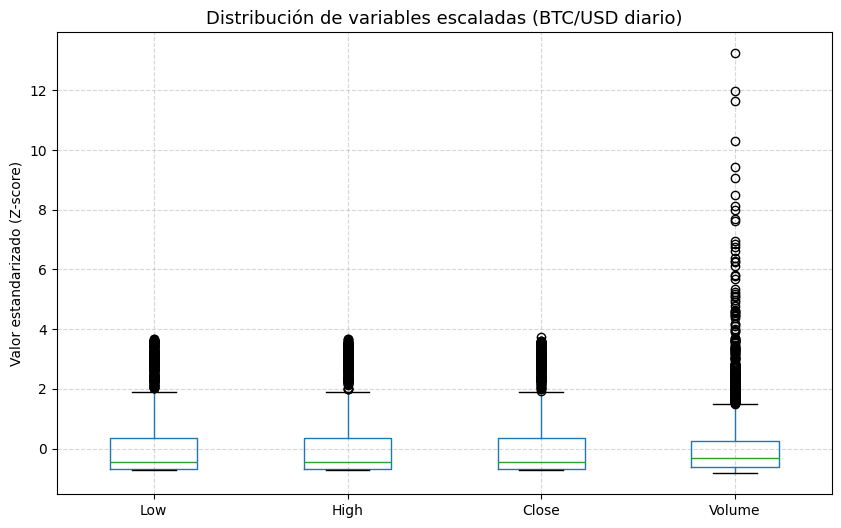

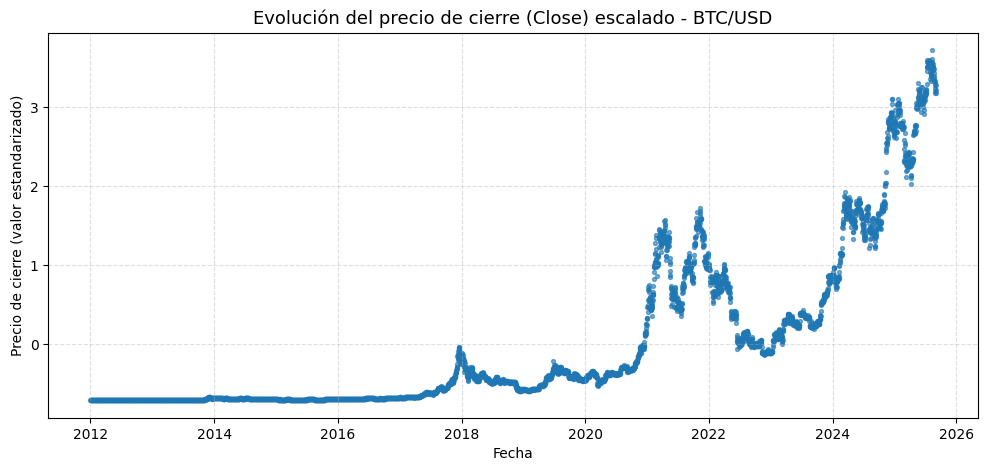

In [14]:
plt.figure(figsize=(10,6))
btc_scaled[['Low','High','Close','Volume']].boxplot()
plt.title("Distribución de variables escaladas (BTC/USD diario)", fontsize=13)
plt.ylabel("Valor estandarizado (Z-score)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(12,5))
plt.scatter(btc_scaled.index, btc_scaled["Close"], s=8, alpha=0.6, color="tab:blue")
plt.title("Evolución del precio de cierre (Close) escalado - BTC/USD", fontsize=13)
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (valor estandarizado)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

## Observación previa a escalado del comportamiento del valor de cierre sin escalar, puntos rojos representan outliers

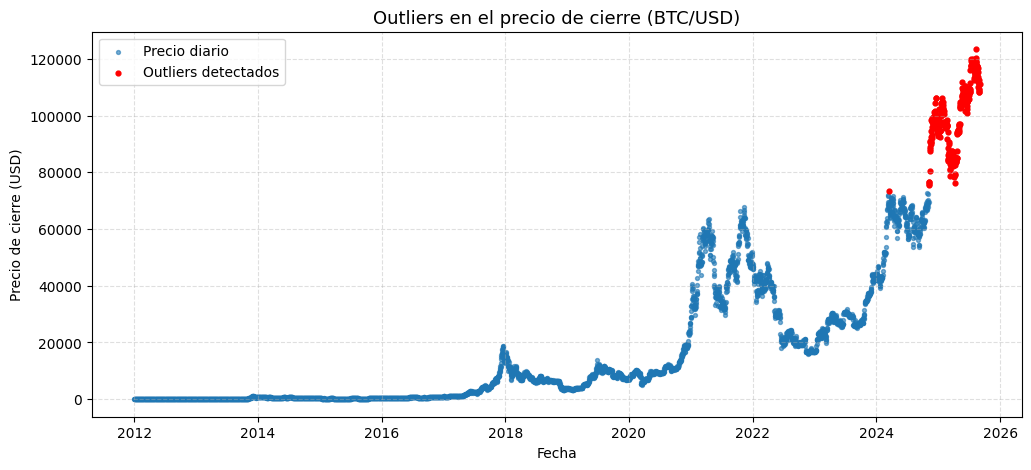

# **==========================**
# **==| INICIO DE DESARROLLO EV 3 |===**
# **==========================**